before iteraction: weightedsum, sigmoidfn [-0.16595599] [0.45860596]
after iteraction: weightedsum, sigmoidfn [9.67299303] [0.99993704]


Text(0, 0.5, 'weights')

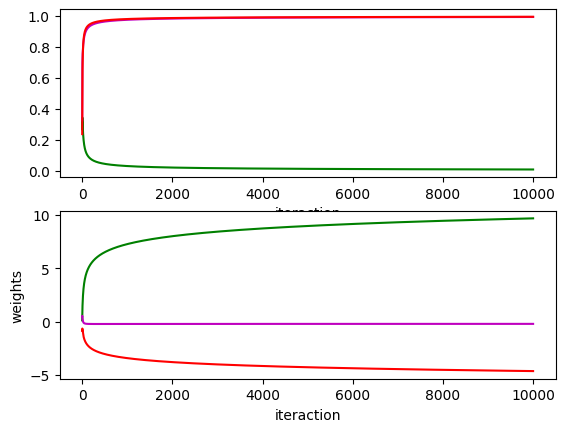

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

#catagorizing
training_set_inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = np.array([[0, 1, 1, 0]]).T # .T is tranpose of matrix
#print("training data ",training_set_inputs,training_set_outputs)

# model single neuron, with 3 inputs and 1 output. Assign random weights in range -1 to 1 in 3 x 1 matrix,
synaptic_weights = 2 * np.random.random((3, 1)) - 1


weightedsum = np.dot(np.array([1, 0, 0]), synaptic_weights)
sigmoidfn = 1 / (1 + np.exp(-weightedsum))
print("before iteraction: weightedsum, sigmoidfn", weightedsum, sigmoidfn)

Ni = 10000
out = np.zeros((3,Ni))
wgt = np.zeros((3,Ni))
for i in range(Ni):
    output = 1 / (1 + np.exp(-( np.dot(training_set_inputs, synaptic_weights))))
    out[0,i] = output[0]
    out[1,i] = output[1]
    out[2,i] = output[2]
    synaptic_weights += np.dot(training_set_inputs.T, (training_set_outputs - output) * output * (1 - output))
    wgt[0,i] = synaptic_weights[0]
    wgt[1,i] = synaptic_weights[1]
    wgt[2,i] = synaptic_weights[2]

weightedsum = np.dot(np.array([1, 0, 0]), synaptic_weights)
sigmoidfn = 1 / (1 + np.exp(-weightedsum))
print("after iteraction: weightedsum, sigmoidfn", weightedsum, sigmoidfn)

figs, axes = plt.subplots(2)

axes[0].plot(out[0,:],"g")
axes[0].plot(out[1,:],"m")
axes[0].plot(out[2,:],"r")
axes[0].set_xlabel('iteraction')
plt.ylabel('weights')

axes[1].plot(wgt[0,:],"g")
axes[1].plot(wgt[1,:],"m")
axes[1].plot(wgt[2,:],"r")
axes[1].set_xlabel('iteraction')
axes[1].set_ylabel('weights')

